In this demonstration we'll look at a sample example, which would be following the same procedure through which the assignment problem can be solved

In [309]:
#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [186]:
pwd


'C:\\Users\\S Pradhan'

In [187]:
#Let's read the dataset first
dat = pd.read_csv("Country_data_Dibyalok.csv")
dat.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [188]:
dat['country'].value_counts()

Madagascar         1
Estonia            1
Cambodia           1
Burkina Faso       1
Malta              1
                  ..
Sierra Leone       1
Iran               1
Kyrgyz Republic    1
Zambia             1
Vanuatu            1
Name: country, Length: 167, dtype: int64

##### We will try to cluster the data into some similar types of species

In [189]:
## Let's drop species column as this is a label column and we don't need it in case of unsupervised learning models
#dat.drop('species', axis = 1, inplace = True)

In [190]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [191]:
# Now, we need to create a ID columns, without this we will not be able to make necessary conclusions or we will not be able to
# identify that which observation goes to which cluster
#dat['ID'] = dat.index+100

In [192]:
# Let's check the shape again
dat.shape

(167, 10)

#### The ID column will be useful while performing cluster profiling, I wanted to know which flower goes into which cluster

In [193]:
# Also, check the info again
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [311]:
dat.duplicated(subset = ['country'], keep = False).sum()

0

In [194]:
# Number of nulls per column
dat.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Let's perfrom Outlier treatment

In [312]:
dat.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [313]:
dat.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb33291708>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb33291d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb30436f88>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb33297d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb33297e08>],
 'means': []}

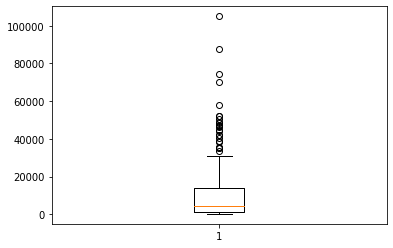

In [314]:
plt.boxplot(dat.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb329ffac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb329ffc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb329ff2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb32a05f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb32a05cc8>],
 'means': []}

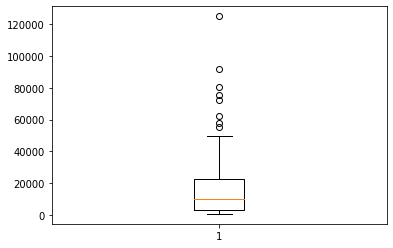

In [315]:
plt.boxplot(dat.income)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb3088db88>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb3088dd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb3088d408>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb30851d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb30851d88>],
 'means': []}

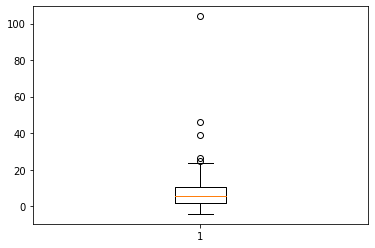

In [316]:
plt.boxplot(dat.inflation)

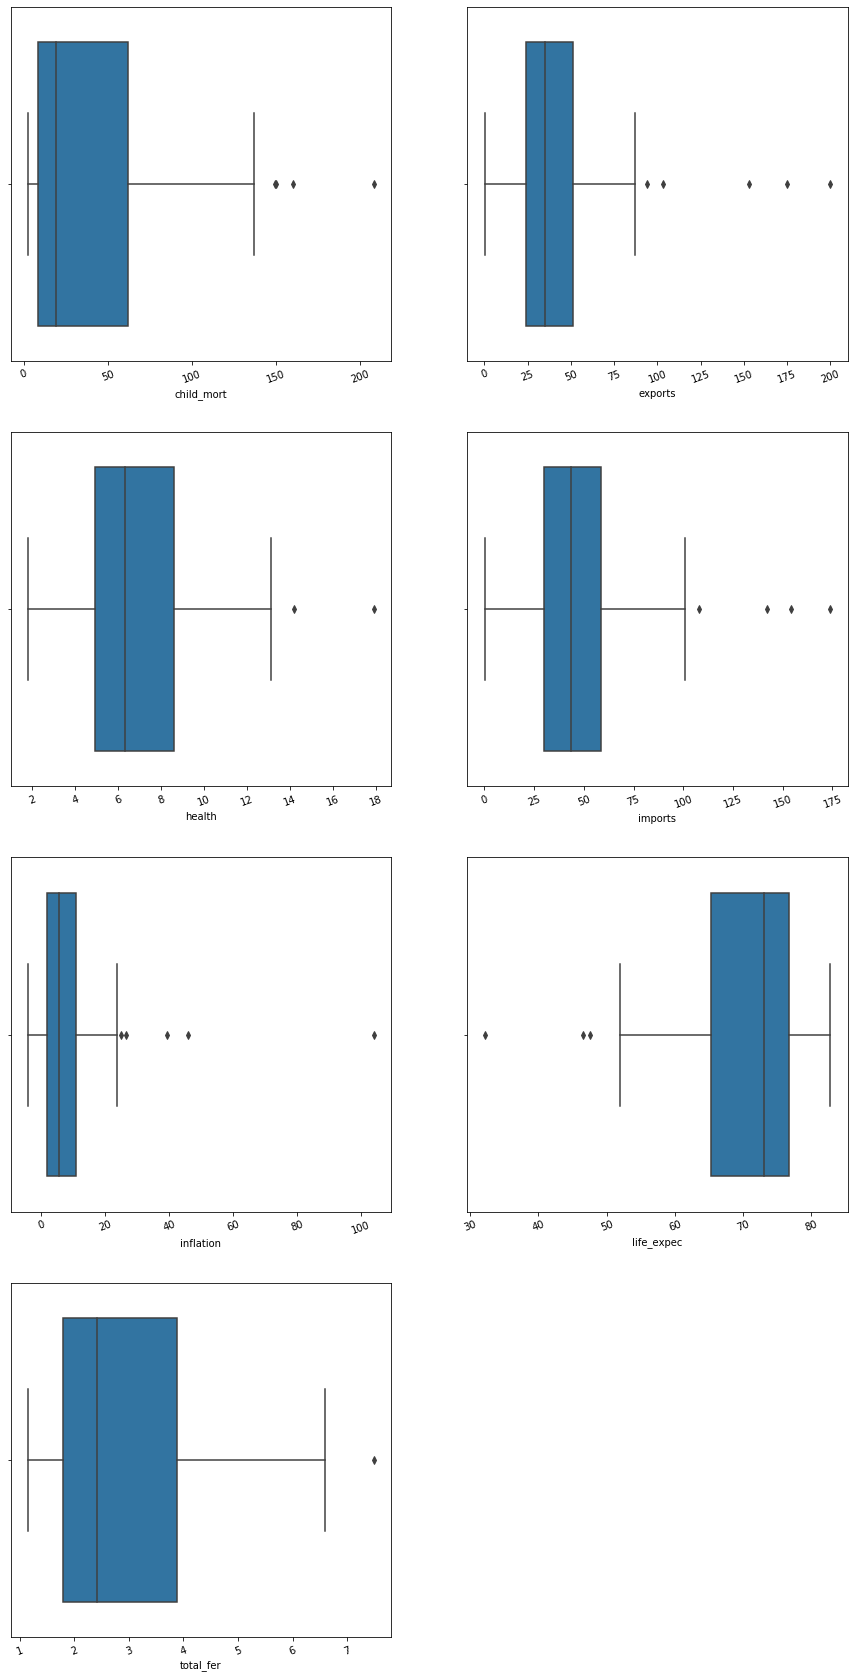

In [317]:
plt.figure(figsize=(15,30))
features = ['child_mort', 'exports', 'health', 'imports',
       'inflation', 'life_expec', 'total_fer']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=dat)
    plt.xticks(rotation = 20)

In [200]:
#We see that gdpp, income and inflation column has high outliers. However let's not remove outliers frominflation 
#as this might lead to loss in country details which are not doing well- socio-economically
#(countries with direst need of aid).

In [318]:
dat.set_index('country',inplace = True)

In [319]:
Q1 = dat.gdpp.quantile(0.05)
Q3 = dat.gdpp.quantile(0.95)
country_df = dat[(dat.gdpp <= Q3)]

In [320]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,119.256000,13.573000,127.780000,73433.000000,42.081000,82.301000,6.567200,47115.000000


In [322]:
country_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [323]:
#We see that most of the outliers are handled just by handling gdpp column.
country_df.shape

(158, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb2f14b308>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb2f14be48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb2f145b48>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb2f14fdc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb2f14fec8>],
 'means': []}

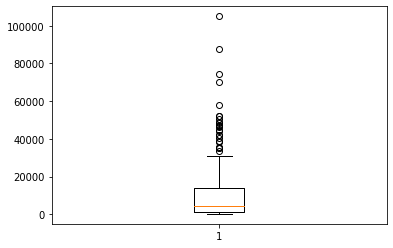

In [324]:
plt.boxplot(dat.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb30235fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb3023afc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb302355c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb30690f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb30690ec8>],
 'means': []}

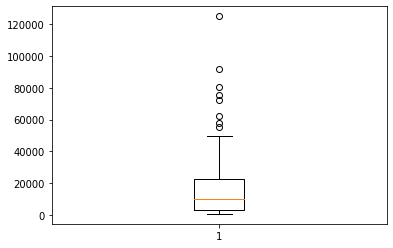

In [325]:
plt.boxplot(dat.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001BB306F1748>, <matplotlib.lines.Line2D object at 0x000001BB306F1F08>], 'caps': [<matplotlib.lines.Line2D object at 0x000001BB306F1E88>, <matplotlib.lines.Line2D object at 0x000001BB306F5E88>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001BB306ECC48>], 'medians': [<matplotlib.lines.Line2D object at 0x000001BB306F5F88>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001BB306FCE08>], 'means': []}


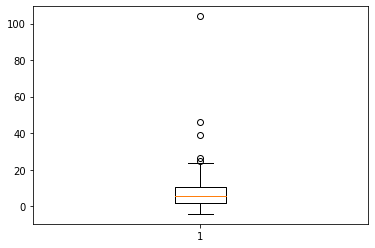

In [326]:
print(plt.boxplot(dat.inflation))

In [208]:
#dat.set_index('country',inplace = True)

In [209]:
Q1 = dat.gdpp.quantile(0.05)
Q3 = dat.gdpp.quantile(0.95)
#IQR = Q3-Q1
country_df = dat[(dat.gdpp <= Q3)]

In [210]:
##Lets Us Start the Data Visualation:

In [276]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,119.256000,13.573000,127.780000,73433.000000,42.081000,82.301000,6.567200,47115.000000


In [327]:
country_df.shape

(158, 9)

<Figure size 288x288 with 0 Axes>

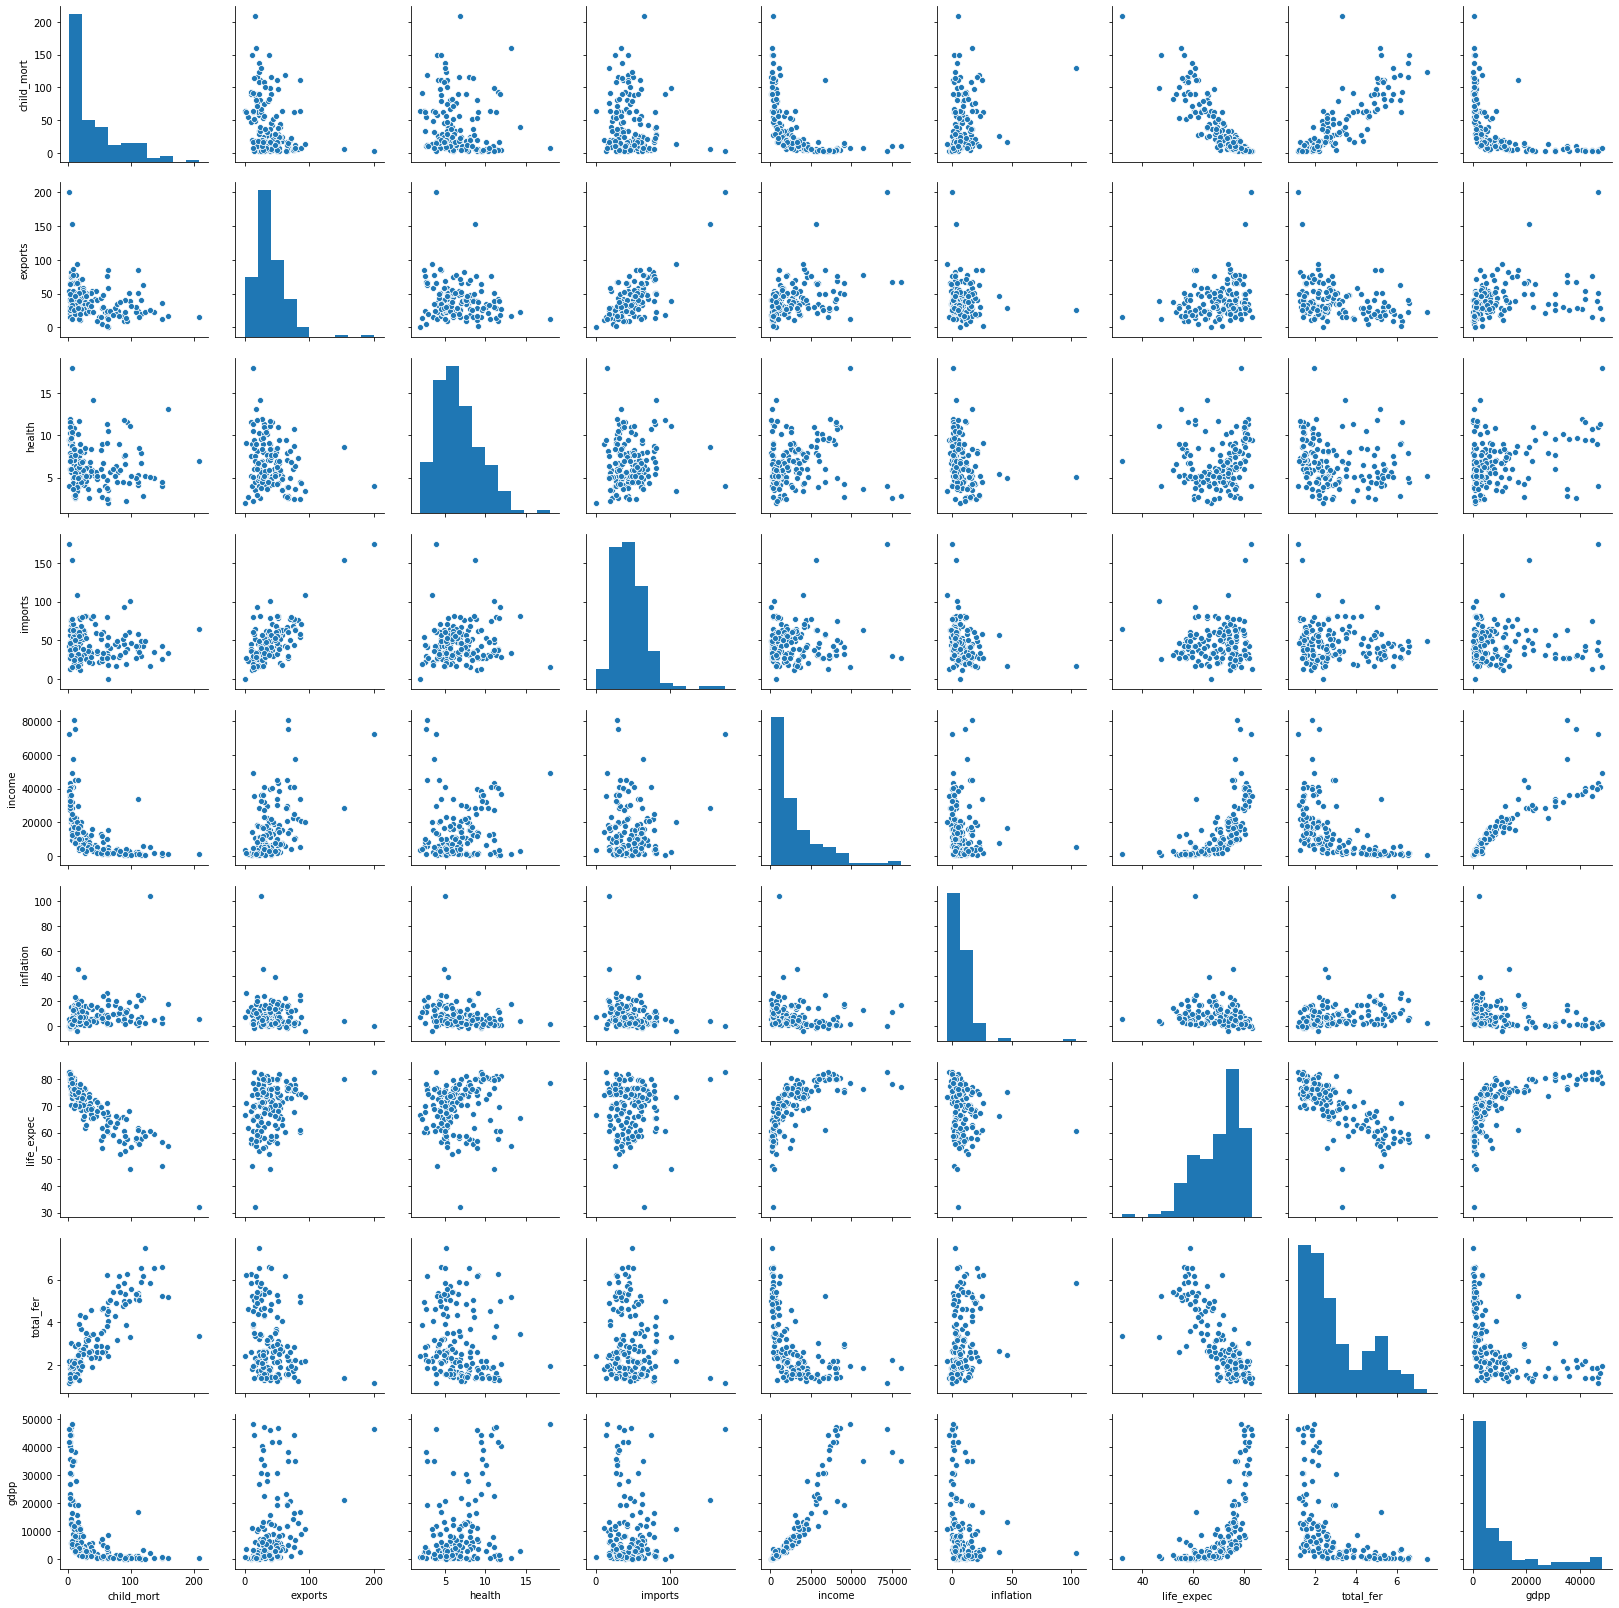

In [328]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

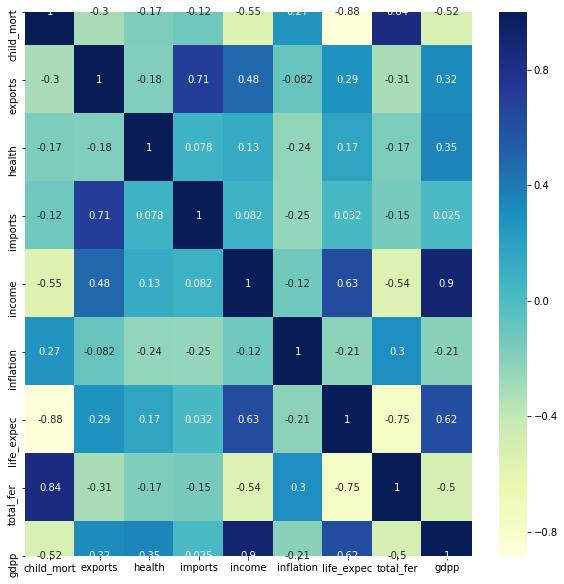

In [329]:
# Heatmap to understand the corelation better.
plt.figure(figsize = (10,10))  
sns.heatmap(country_df.corr(),annot = True,cmap="YlGnBu")

In [215]:
### From the above we can see high correlation between total_fer and child_mort, between gdpp and income,and between 
#imports and exports


In [330]:
country_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


### Let's begin with analysis part 

### Principal Component Analysis

In [281]:
#standardise all parameters
#country_df = dat.drop("country", axis=1)

In [331]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_norm = standard_scaler.fit_transform(country_df)

In [332]:
country_norm = pd.DataFrame(country_norm)
country_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-1.170253,0.333170,-0.063839,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.454926,-0.051834,0.095946,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.041627,-0.941453,-0.646837,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,0.908169,-1.434856,-0.150209,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.240530,-0.246204,0.540752,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [333]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [334]:
pca.fit(country_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [335]:
pca.components_

array([[-4.29030525e-01,  2.55209832e-01,  1.34178285e-01,
         1.31450432e-01,  4.07693446e-01, -1.79172211e-01,
         4.31281152e-01, -4.14623599e-01,  3.99105167e-01],
       [ 1.11571336e-01,  6.26379514e-01, -2.77405040e-01,
         6.77160121e-01, -2.31878558e-02, -5.16544119e-02,
        -1.67479074e-01,  7.48372976e-02, -1.51147079e-01],
       [-4.15586874e-02,  1.65804096e-01, -6.21898369e-01,
        -3.00546950e-01,  2.52933247e-01,  6.41231036e-01,
         1.20926305e-01,  5.91157438e-03,  6.23316904e-02],
       [ 3.78896334e-01,  1.25334264e-01,  4.18106890e-01,
         3.92312068e-02,  4.08208237e-01,  2.46846528e-01,
        -2.31647606e-01,  3.66642523e-01,  4.98720267e-01],
       [-2.10302855e-01,  2.05622263e-02,  4.97644383e-01,
         2.62211666e-01, -2.60517467e-01,  6.88800973e-01,
         1.29156175e-01, -1.65619335e-01, -2.29167627e-01],
       [ 1.86245017e-01, -5.01345979e-02, -4.28272915e-03,
        -4.26434872e-02,  1.45028292e-01,  6.489172

In [296]:
#Understanding how the variables are loaded on the principal components. 
colnames = list(country_norm.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6], 'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'Feature':colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542,child_mort
1,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082,exports
2,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088,health
3,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037,imports
4,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982,income
5,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236,inflation
6,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040,life_expec
7,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336,total_fer
8,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646,gdpp


In [336]:
#What is the variance explained by the first principal component

pca.explained_variance_ratio_

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

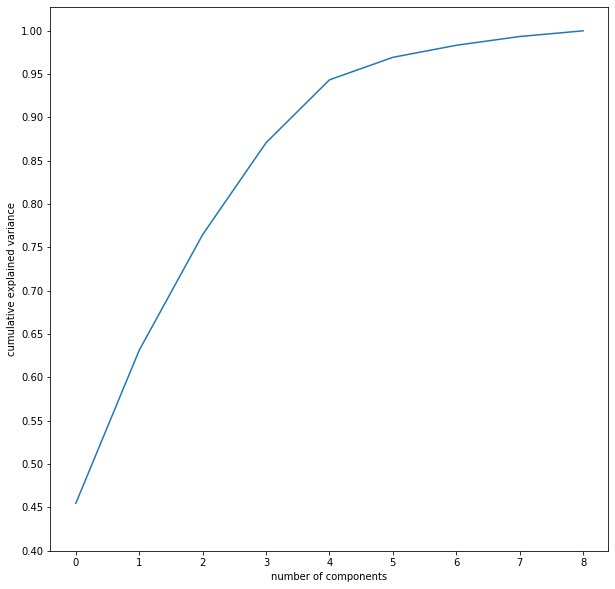

In [337]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()



In [338]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [339]:
df_final1 = pca_final.fit_transform(country_norm)
df_final1.shape

(158, 5)

In [340]:
corrmat = np.corrcoef(df_final1.transpose())

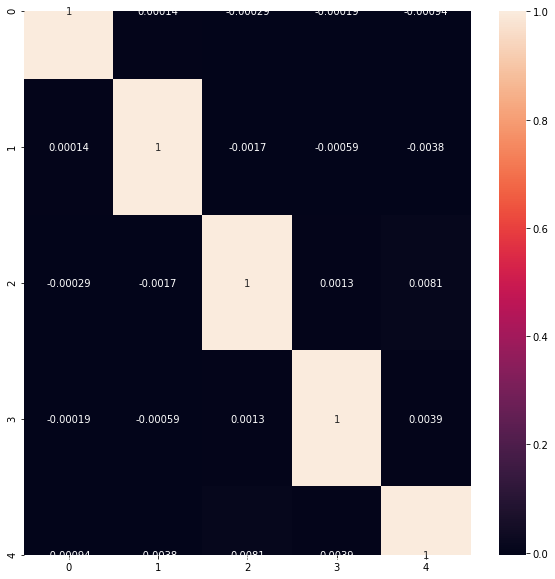

In [341]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(corrmat,annot = True)

In [342]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008069188238945174 , min corr:  -0.0038318816332864403


In [231]:
## from the above Heatmap we can conclude that the co-relations are equal to zero or no-corelations exist.

In [343]:
pc = np.transpose(df_final1)

In [344]:
df_final = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})
df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401
3,-2.830780,1.451765,1.559083,1.124602,-0.375038
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215


In [345]:
df_final.shape

(158, 5)

###LETS US DO THE HOPKINS STATISTICS

In [348]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [350]:
#Let's check the Hopkins measure
#hopkins(pca_df2.drop('ID', axis = 1))
hopkins(df_final)

0.8555399354213011

In [237]:
#Answer here: Since the value is > 0.8 the given dataset has a good tendency to form clusters.


In [351]:
df_KMEAN = df_final

### K- means Clustering

In [353]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_KMEAN)
    sse_.append([k, silhouette_score(df_KMEAN, kmeans.labels_)])

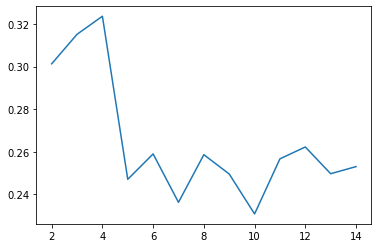

In [354]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## By looking silhouette analysis, we see the highest peak is at k =4 , so let us take k as 4.

In [355]:
#Let's perform K means using K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus4.fit(df_KMEAN)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [356]:
# Let's add the cluster Ids to the PCs data 

df_km1 = df_final
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_detail_km = pd.concat([df_km1, pd.Series(model_clus4.labels_)], axis=1)
countries_detail_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
countries_detail_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467,0
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215,0


In [357]:
# Check the count of observation per cluster
countries_detail_km['ClusterID'].value_counts()

0    83
1    46
2    27
3     2
Name: ClusterID, dtype: int64

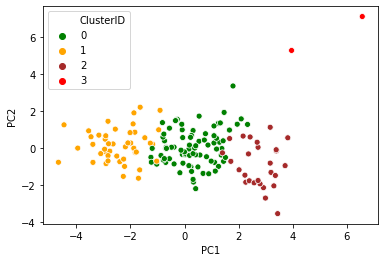

In [358]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=countries_detail_km, palette=['green','orange','brown','red'])

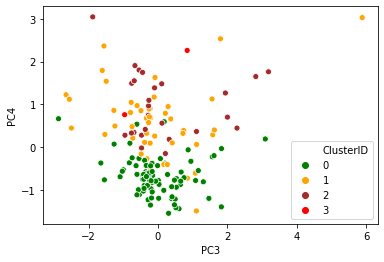

In [359]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=countries_detail_km,palette=['green','orange','brown','red'])

In [360]:
# merge b/w km df and actually data
country_merge_km=pd.merge(country_df.reset_index(),countries_detail_km,left_index=True,right_index=True )
country_merge_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571663,-0.365855,-0.285368,-1.233879,0.278467,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295018,0.323543,-0.154906,-0.664375,-0.173215,0


## Cluster Profiling

In [361]:
country_final=country_merge_km.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [248]:
#Cluster Analysis

child_mort_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).child_mort.mean())
exports_mean= 	pd.DataFrame(country_final.groupby(["ClusterID"]).exports.mean())
health_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).health.mean())
imports_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).imports.mean())
income_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).income.mean())
inflat_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).gdpp.mean())

In [362]:
country_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [363]:
country_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


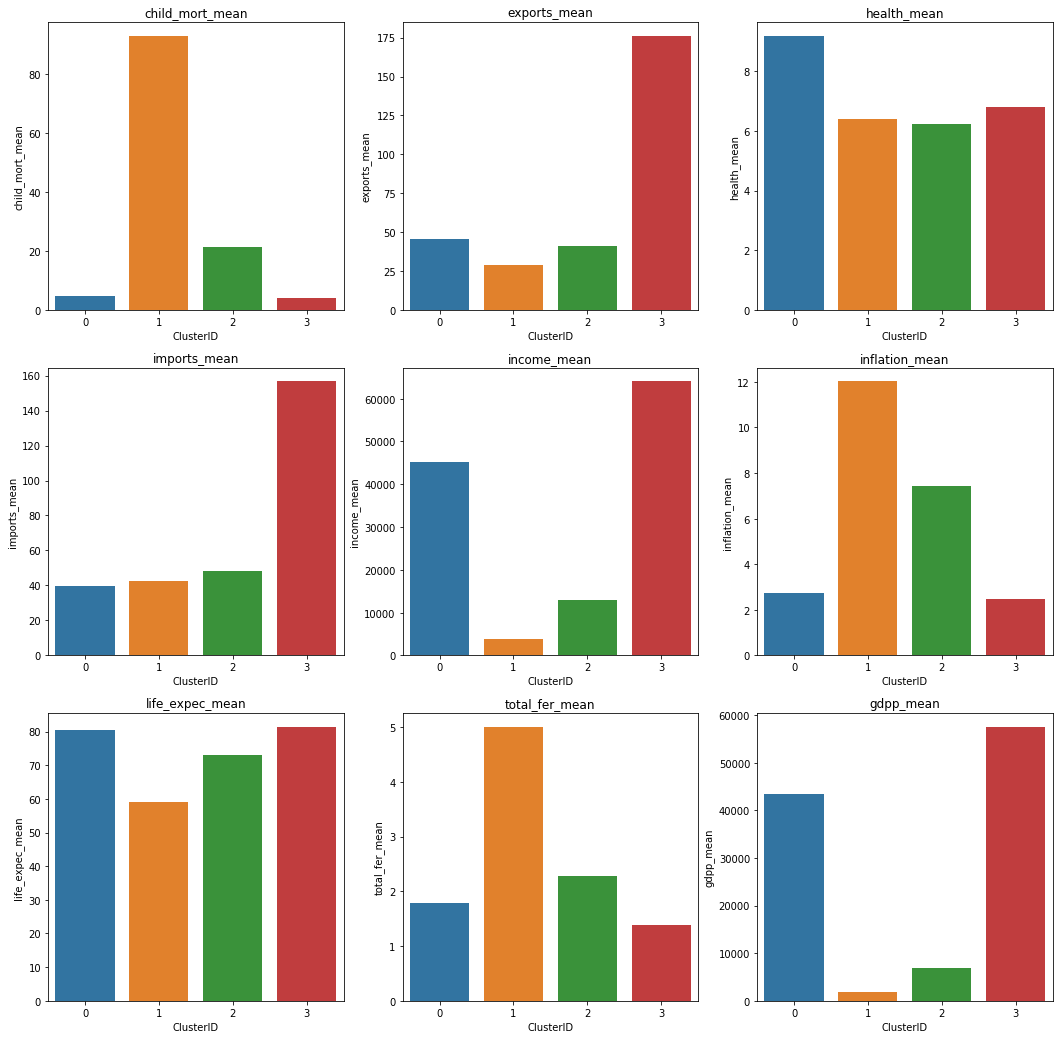

In [364]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.gdpp_mean)

plt.show()

Analysing the graphs above, we can conclude that the readings for cluster 1 is to be looked at becuase of a.Highest child mortality, b.Lowest income, c.Highest Inflation, d.Compartively low life expectancy , e.Highest total fertility 
and f.Lowest gdpp.


In [365]:
# cluster 1
cluster_km=country_final[country_final['ClusterID']==1]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
48,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1


##Hierarchical Clustering##

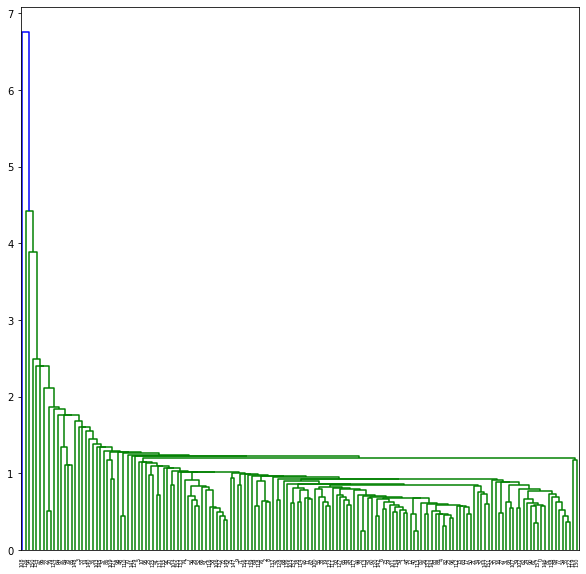

In [366]:
df_clustering = df_final
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

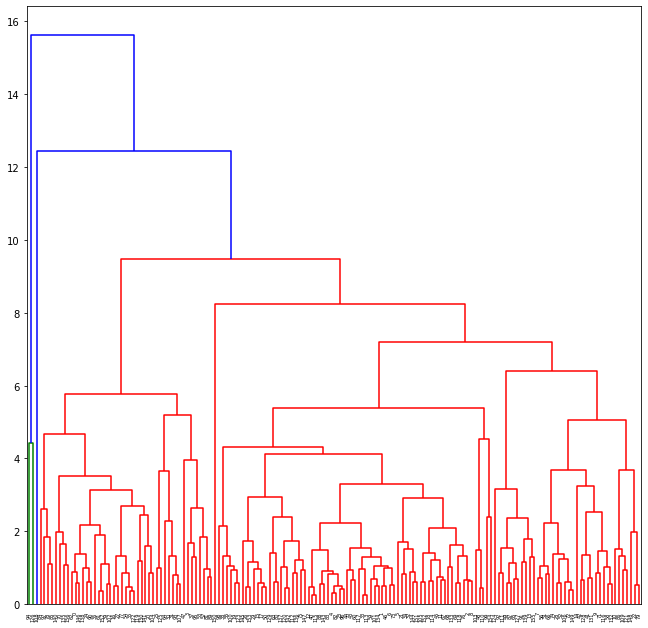

In [367]:
fig = plt.figure(figsize = (11,11))
mergings = linkage(df_clustering, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [255]:
##Let us cut the dendrogram vertically such that n_clusters = 4


In [368]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [369]:
country_hc = pd.concat([country_df.reset_index(), clusterCut], axis=1)
country_hc.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',
                  'ClusterID']
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [258]:
country_hc['ClusterID'].value_counts()


0    132
1     30
2      4
3      1
Name: ClusterID, dtype: int64

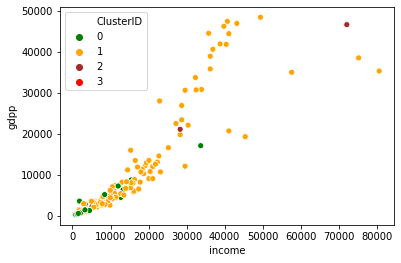

In [370]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_hc,palette=['green','orange','brown','red'])

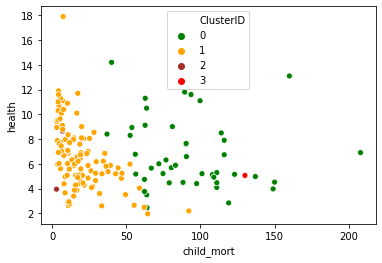

In [371]:
# scatterplot for child mort ,inflation for different cluster ids
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=country_hc,palette=['green','orange','brown','red'])

In [372]:
child_mort_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
exports_mean_hc= 	pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
health_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
imports_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
income_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
inflat_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
life_expec_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [373]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

In [374]:
country_analysis_df_hc.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,91.820000,30.000444,6.767333,44.668889,3950.733333,9.827222,59.104444,4.989778,1985.777778
1,1,18.904545,40.948900,6.678182,45.202417,18416.636364,6.633555,74.286364,2.205727,12790.218182
2,2,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


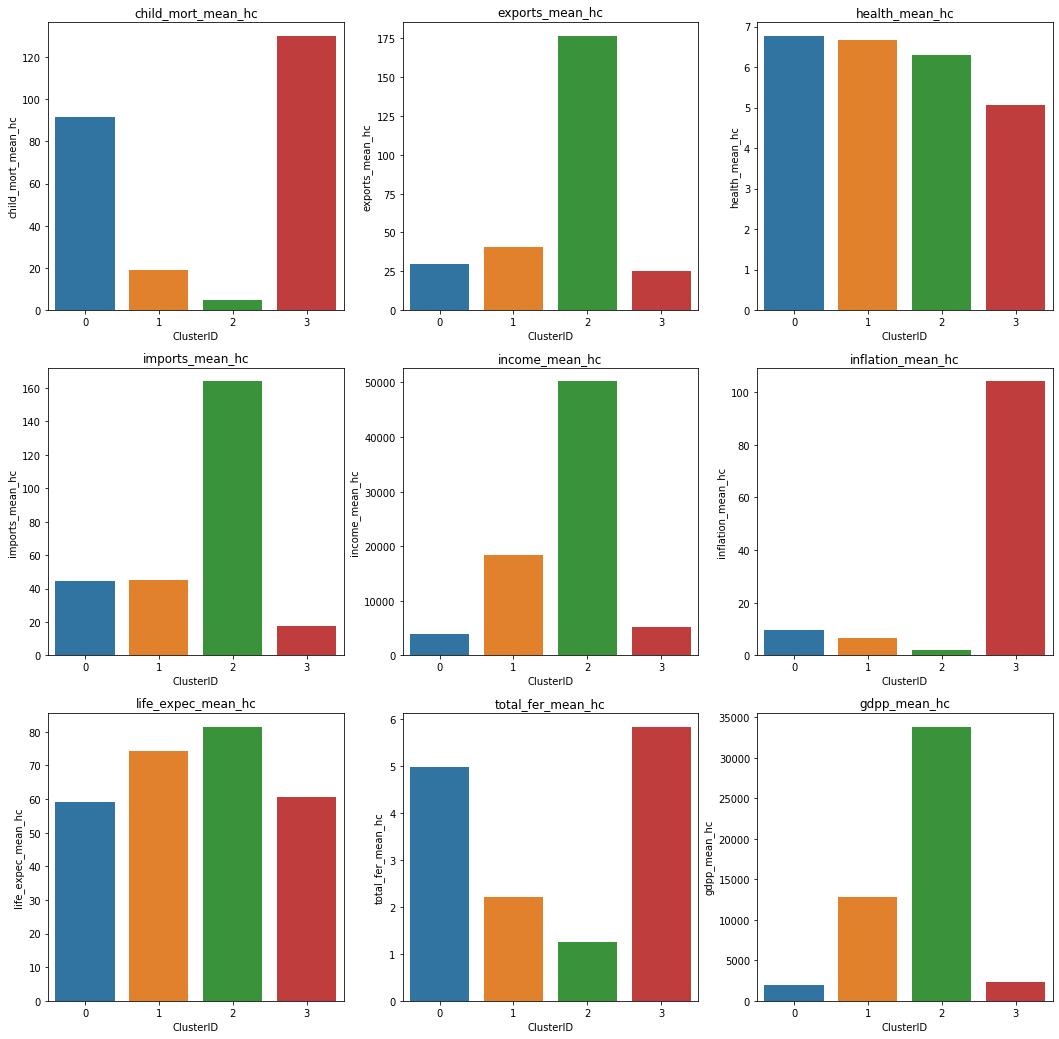

In [375]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.child_mort_mean_hc)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.exports_mean_hc)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.health_mean_hc)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.imports_mean_hc)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.income_mean_hc)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.inflation_mean_hc)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.life_expec_mean_hc)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.total_fer_mean_hc)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.gdpp_mean_hc)

plt.show()

In [377]:
#Let us bin our cluster 0
cluster_hc=country_hc[country_hc['ClusterID']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
141,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
